In [1]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config IPCompleter.greedy=True

#Datos de Properati
data = pd.read_csv('/home/martin/Documents/jupyter/datasets/properati-AR-2017-08-01-properties-sell.csv')

In [2]:
#Separo los datos de Capital Federal y Gran Buenos Aires
dataCFs = data[data['state_name']== 'Capital Federal']
dataGBAs = data.loc[data.state_name.str.contains('G.B.A.'),:]

#Filtro los datos que me interesan (barrio, superficie, precio, y ubicacion)
dataCF = dataCFs[['place_name','surface_covered_in_m2','price_per_m2','lat','lon']]
dataGBA = dataGBAs[['place_name','surface_covered_in_m2','price_per_m2','lat','lon']]

#Limpio los Na
dataCF.dropna(inplace = True)
dataGBA.dropna(inplace = True)

#Agrego una columna con el precio de la propiedad (superficie*precio por m2)
dataCF['precio_propiedad'] = dataCF['surface_covered_in_m2']*dataCF['price_per_m2']
dataGBA['precio_propiedad'] = dataGBA['surface_covered_in_m2']*dataGBA['price_per_m2']

#Armo un join de ambos datos
dataCFGBA = pd.concat([dataCF, dataGBA])

/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stabl

In [3]:
dataCFGBA.sample(10)

,place_name,surface_covered_in_m2,price_per_m2,lat,lon,precio_propiedad
83421,Banfield,63.0,2460.317460,-34.744101,-58.410761,155000.0
115584,Caseros,97.0,1216.494845,-34.609140,-58.581466,118000.0
185822,Villa Riachuelo,20.0,8250.000000,-34.690946,-58.469362,165000.0
177660,José C Paz,82.0,963.414634,-34.496812,-58.763600,79000.0
84372,Villa Pueyrredón,218.0,1284.403670,-34.576463,-58.509304,280000.0
274,Villa Madero,42.0,10000.000000,-34.688474,-58.498345,420000.0
77810,Puerto Madero,68.0,5882.352941,-34.611066,-58.362659,400000.0
37701,Nordelta,486.0,3909.465021,-34.446523,-58.633874,1900000.0
87045,Tigre,44.0,2704.545455,-34.432017,-58.587367,119000.0
43769,Balvanera,50.0,2700.000000,-34.604410,-58.392109,135000.0


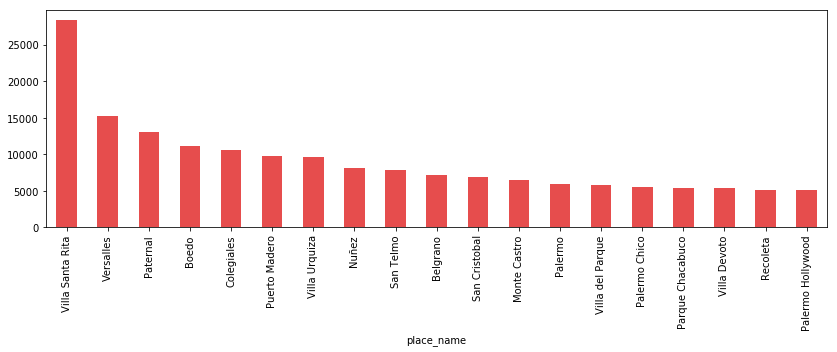

In [4]:
#Barrios de mayor precio por metro cuadrado en Capital Federal
dataCF.groupby('place_name').mean()['price_per_m2'].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4),color=(0.9,0.3,0.3));

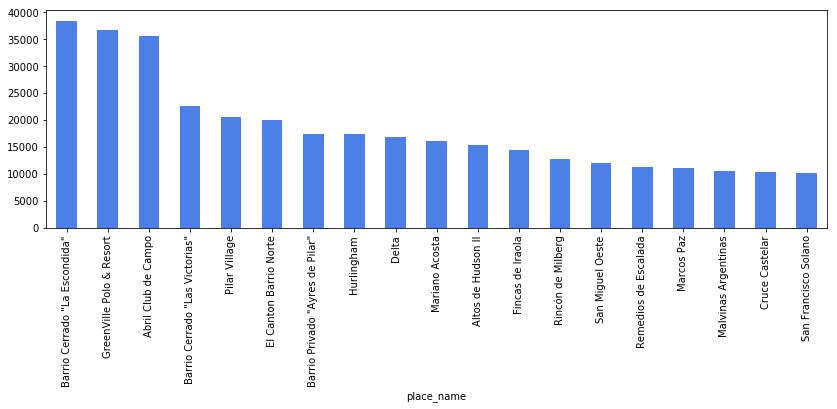

In [5]:
#Barrios de mayor precio por metro cuadrado en Gran Buenos Aires
dataGBA.groupby('place_name').mean()['price_per_m2'].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4),color=(0.3,0.5,0.9));

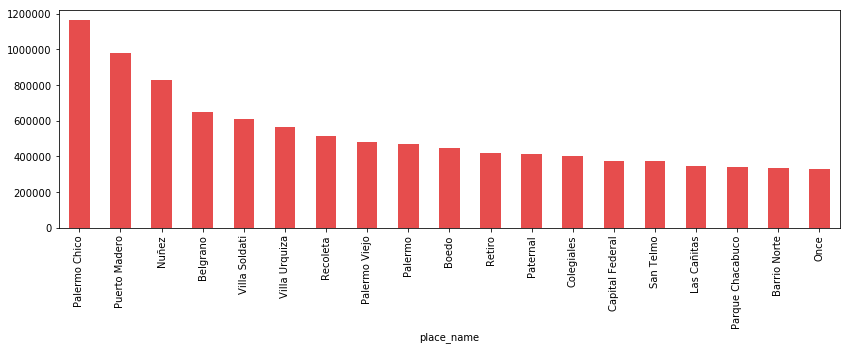

In [6]:
#Barrios de mayor precio de propiedad en Capital Federal
dataCF.groupby('place_name').mean()['precio_propiedad'].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4),color=(0.9,0.3,0.3));

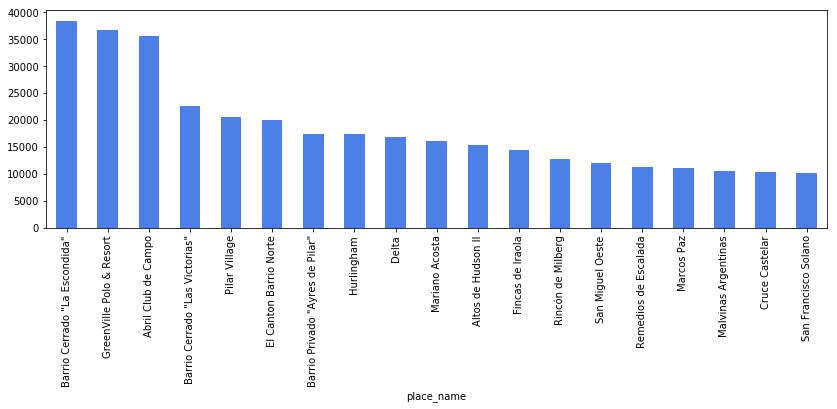

In [7]:
#Barrios de mayor precio de propiedad en Gran Buenos Aires
dataGBA.groupby('place_name').mean()['price_per_m2'].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4),color=(0.3,0.5,0.9));

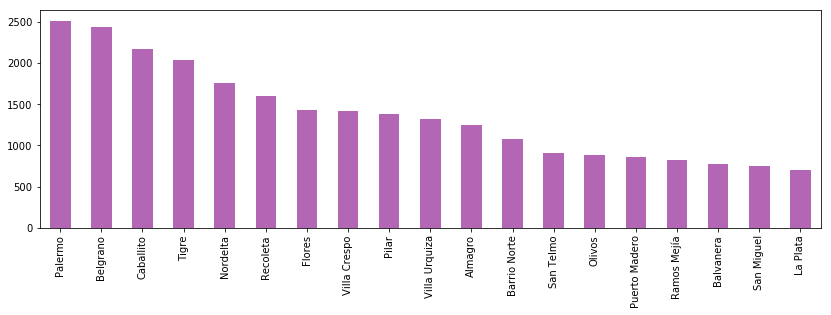

In [8]:
#Top de propiedades por barrio (GBA y CF)
dataCFGBA['place_name'].value_counts()[0:19].plot(kind='bar',figsize=(14,4), color=(0.7,0.4,0.7));

In [9]:
#¿La cercanía al centro afecta los precios?

#Coordenadas del obelisco: 34°36′11″S 58°22′54″O / -34.603075, -58.381653
obelisco_lon=-58.381653
obelisco_lat=-34.603075

#le agrego a los datos de Capital Federal una columna con la distancia al centro (tomo el obelisco como referencia)
dataCF['dist_centro'] = np.absolute(dataCF['lon'] - obelisco_lon)+ np.absolute(dataCF['lat'] - obelisco_lat)

/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


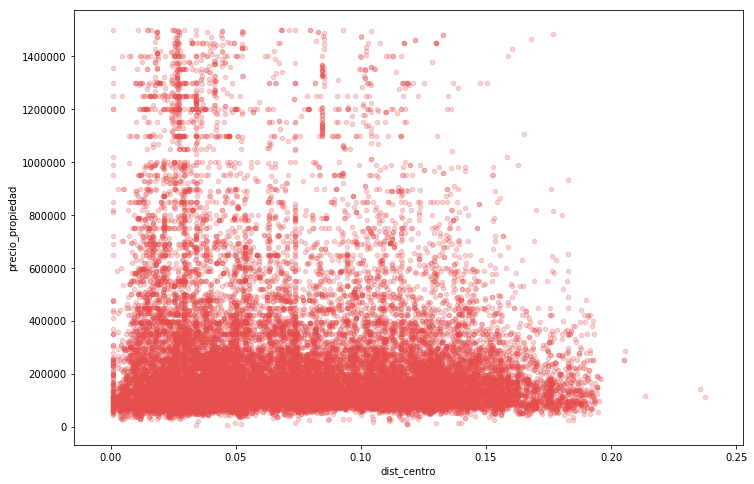

In [10]:
#Armo scatter plot con relación entre la distancia al obelisco y el precio
dataCF1 = dataCF[dataCF['precio_propiedad']< 1500000]
dataCF2 = dataCF1[dataCF1['dist_centro']< 1]
dataCF2.plot.scatter('dist_centro', 'precio_propiedad',alpha=0.25, figsize=(12,8), color=(0.9,0.3,0.3))